<a href="https://colab.research.google.com/github/sainathss97/TensorFlow_practice/blob/main/Minist_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [95]:
X_train.shape

(60000, 28, 28)

In [96]:
y_train.shape

(60000,)

In [97]:
class_names = list(set(y_train))

In [98]:
class_names,len(class_names)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 10)

Text(0.5, 1.0, '9')

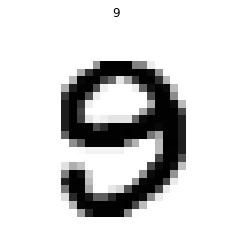

In [99]:
import matplotlib.pyplot as plt
import random
n = random.randint(0,6000)
pred_img = X_train[n]
plt.imshow(X_train[n],cmap='binary')
plt.axis(False)
plt.title(y_train[n])

In [100]:
X_train.shape

(60000, 28, 28)

In [101]:
X_train.min(),X_train.max()

(0, 255)

# Steps to Follow:
1. normalize data 
2. build the model
3. fit the model
4. evaluate the model
5. hyper param tununing

In [102]:
import tensorflow as tf
def noramlize_data(data)->float:
    '''takes in train/test data then normalizes with 255 as 255 is a pixel value'''
    data = data/255.
    data = tf.expand_dims(data,axis=3)
    return data

In [103]:
X_train = noramlize_data(data = X_train)
X_test = noramlize_data(data = X_test)
X_train.shape,X_test.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

In [104]:
y_train.shape

(60000,)

In [105]:
import tensorflow as tf
X_train.shape[0]


60000

In [106]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Conv2D(10, 3, activation='relu',input_shape=(28, 28, 1)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(units = 10,activation='softmax')
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=Adam(lr=0.01),
                metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [107]:
history_1 =model_1.fit(X_train,
            y_train,
            batch_size=32,
            epochs=5,
            validation_data =(X_test,y_test),
            )

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1548 - accuracy: 0.9523 - val_loss: 0.0776 - val_accuracy: 0.9755
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0911 - accuracy: 0.9728 - val_loss: 0.0669 - val_accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0882 - accuracy: 0.9743 - val_loss: 0.0945 - val_accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0814 - accuracy: 0.9754 - val_loss: 0.0823 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0812 - accuracy: 0.9760 - val_loss: 0.0795 - val_accuracy: 0.9761


In [108]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0795 - accuracy: 0.9761


[0.07949642837047577, 0.9761000275611877]

In [109]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                  

In [110]:
import pandas as pd
history = pd.DataFrame(history_1.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.154801,0.952283,0.077628,0.9755
1,0.091107,0.972833,0.066876,0.9762
2,0.088182,0.974317,0.094510,0.9707
3,0.081408,0.975450,0.082268,0.9760
4,0.081228,0.975967,0.079496,0.9761


In [111]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(1,len(history.history['loss'])+1)

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

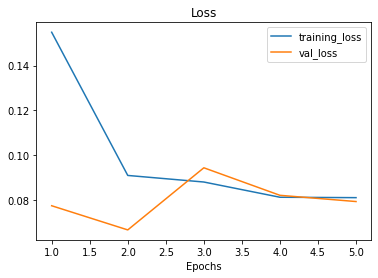

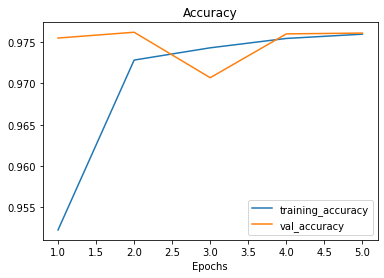

In [112]:
plot_loss_curves(history_1
                 )

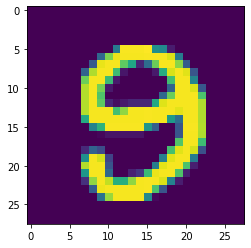

In [113]:

plt.imshow(pred_img)

In [114]:
pred_img_norm = pred_img/255.
pred_img_norm = tf.reshape(pred_img,shape=(28,28,1))

pred_img_norm.shape

TensorShape([28, 28, 1])

In [115]:
model_1.predict(tf.expand_dims(pred_img_norm,axis=0))

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [116]:
title = np.argmax(model_1.predict(tf.expand_dims(pred_img_norm,axis=0)))

(-0.5, 27.5, 27.5, -0.5)

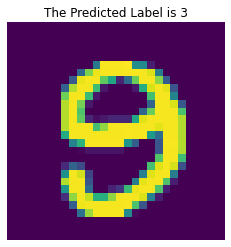

In [117]:
plt.imshow(pred_img)
plt.title(f"The Predicted Label is {title}")
plt.axis('off')